In [1]:
import scanpy as sc
import anndata
import os
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import umap
import importlib
import sys
sys.path.insert(0,"../helper_code")
import plotting_helpers as ph

plt.rcParams["figure.figsize"]=(6,6)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
print("Scanpy version " + sc.__version__)
print("UMAP version " + umap.__version__)
print("Pandas version " +pd.__version__)
print("Numpy version "+np.__version__)

Scanpy version 1.7.2
UMAP version 0.5.1
Pandas version 1.1.5
Numpy version 1.19.2


In [3]:
nodub_adata=sc.read_h5ad("analysis_objects/all_grans_nodubs.h5ad")

In [19]:
nodub_adata.write_h5ad("analysis_objects/all_grans_nodubs.h5ad")

In [17]:
nodub_adata.obs["M.Number"] = nodub_adata.obs["M.Number"].astype(str)

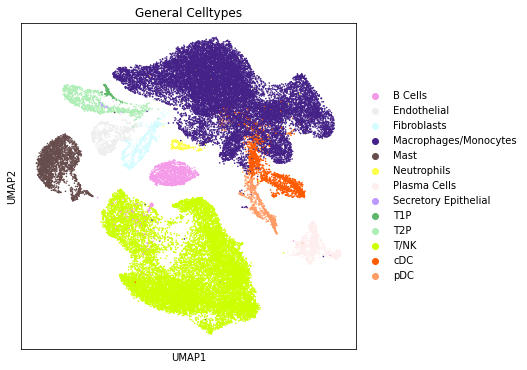

In [7]:
# PART A
sc.pl.umap(nodub_adata, color="General Celltypes",size=10,show=False)
plt.savefig("plots/all_cells_figure/Fig3A_umap_general_celltypes.pdf",bbox_inches="tight")
plt.savefig("plots/all_cells_figure/Fig3A_umap_general_celltypes.png",bbox_inches="tight")

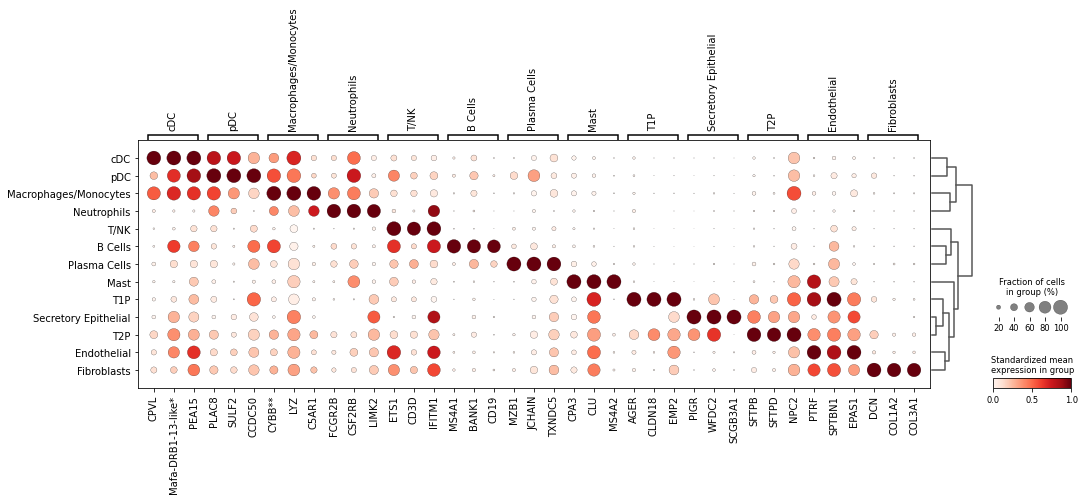

In [8]:
# PART B
sc.tl.rank_genes_groups(nodub_adata,groupby="General Celltypes",pts=True)
sc.tl.filter_rank_genes_groups(nodub_adata,min_in_group_fraction=.6,max_out_group_fraction=.7)
ax=sc.pl.rank_genes_groups_dotplot(nodub_adata,groupby="General Celltypes",n_genes=3,show=False,key="rank_genes_groups_filtered",standard_scale="var",colorbar_title='Standardized mean\nexpression in group')

ph.replace_rankgenesgroups_dotplot_locs(ax)

plt.savefig("plots/all_cells_figure/Fig3B_dotplot_general_celltypes.pdf",bbox_inches="tight")
plt.savefig("plots/all_cells_figure/Fig3B_dotplot_general_celltypes.png",bbox_inches="tight")



In [9]:
# Table corresponding to part B - all cells marker genes
ph.save_filtered_rankgenesgroups(nodub_adata,"tables/differential_genes/all_cells/")

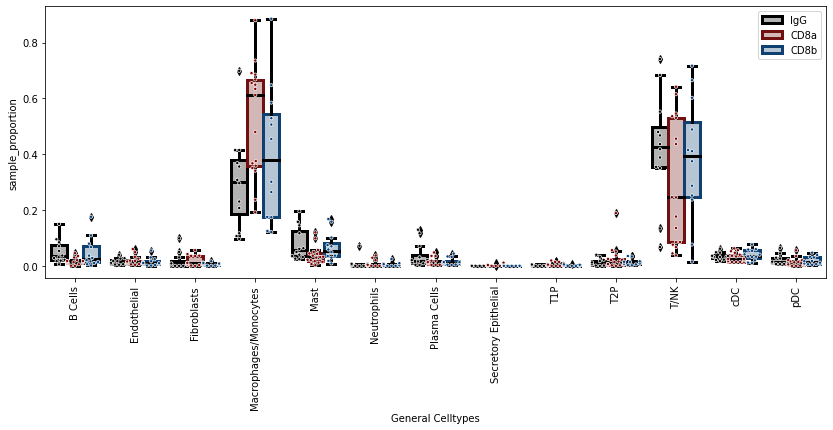

In [10]:
# PART C
ph.boxplot_sample_proportions(nodub_adata, "sample", "General Celltypes",figsize=(14,5),hue_order=["IgG","CD8a","CD8b"],edgecolor=True)
plt.savefig("plots/all_cells_figure/Fig3C_all_cells_proportions_boxplot.png",bbox_inches="tight")
plt.savefig("plots/all_cells_figure/Fig3C_all_cells_proportions_boxplot.pdf",bbox_inches="tight")

In [11]:
# Table corresponding to part C - celltype proportions
celltype_counts = nodub_adata.obs.groupby(["sample","General Celltypes"])["General Celltypes"].count().unstack("General Celltypes").fillna(0)
celltype_counts.to_csv("tables/major_cell_cluster_counts_by_sample.csv")
celltype_proportions = celltype_counts.divide(celltype_counts.sum(axis=1),axis=0)
celltype_meta = pd.read_csv("tables/metadata_by_sample.csv",index_col=0)
celltype_proportions.columns = celltype_proportions.columns.astype(str)
#celltype_proportions["M.Number"] = celltype_meta.loc[celltype_proportions.index,"M.Number"]
celltype_proportions["treatment"] = celltype_meta["treatment"]
celltype_proportions.to_csv("tables/major_cell_cluster_proportions_by_sample.csv")

In [12]:
# mean proportions by treatment
celltype_proportions.groupby(['treatment']).mean()

General Celltypes,B Cells,Endothelial,Fibroblasts,Macrophages/Monocytes,Mast,Neutrophils,Plasma Cells,Secretory Epithelial,T1P,T2P,T/NK,cDC,pDC
treatment,,,,,,,,,,,,,
CD8a,0.016180,0.018139,0.015988,0.524148,0.037334,0.006549,0.015151,0.001023,0.004128,0.027029,0.291648,0.030784,0.011899
CD8b,0.046992,0.014204,0.005678,0.397289,0.067150,0.003773,0.014960,0.000000,0.001268,0.012672,0.378392,0.038938,0.018684
IgG,0.050878,0.014267,0.018310,0.301084,0.078735,0.008005,0.037170,0.000000,0.001813,0.012008,0.422718,0.034921,0.020089


In [13]:
celltype_proportions.groupby(['treatment']).mean().to_csv("tables/mean_major_cell_cluster_proportions_by_treatment.csv")

In [14]:
# standard deviation proportions by treatment
celltype_proportions.groupby(['treatment']).std()

General Celltypes,B Cells,Endothelial,Fibroblasts,Macrophages/Monocytes,Mast,Neutrophils,Plasma Cells,Secretory Epithelial,T1P,T2P,T/NK,cDC,pDC
treatment,,,,,,,,,,,,,
CD8a,0.011565,0.015638,0.017494,0.198601,0.031339,0.011178,0.012784,0.002794,0.006031,0.045086,0.224546,0.016524,0.014652
CD8b,0.052507,0.015614,0.004565,0.242200,0.051623,0.007126,0.013661,0.000000,0.001645,0.011085,0.219290,0.020371,0.014683
IgG,0.042162,0.011456,0.029211,0.170428,0.059215,0.020382,0.043976,0.000000,0.002160,0.013194,0.193637,0.012602,0.018288


In [15]:
celltype_proportions.groupby(['treatment']).std().to_csv("tables/standard_deviation_major_cell_cluster_proportions_by_treatment.csv")

In [16]:
# standard error of mean proportions by treatment
celltype_proportions.groupby(['treatment']).sem()

General Celltypes,B Cells,Endothelial,Fibroblasts,Macrophages/Monocytes,Mast,Neutrophils,Plasma Cells,Secretory Epithelial,T1P,T2P,T/NK,cDC,pDC
treatment,,,,,,,,,,,,,
CD8a,0.002805,0.003793,0.004243,0.048168,0.007601,0.002711,0.003101,0.000678,0.001463,0.010935,0.054460,0.004008,0.003554
CD8b,0.015158,0.004507,0.001318,0.069917,0.014902,0.002057,0.003943,0.000000,0.000475,0.003200,0.063303,0.005880,0.004239
IgG,0.012171,0.003307,0.008432,0.049198,0.017094,0.005884,0.012695,0.000000,0.000624,0.003809,0.055898,0.003638,0.005279


In [17]:
celltype_proportions.groupby(['treatment']).sem().to_csv("tables/sem_major_cell_cluster_proportions_by_treatment.csv")

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  color_map.set_over('black')
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/scanpy/plotting/_tools/__init__.py:1187: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  color_map.set_under('lightgray')
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/scanpy/plotting/_tools/scatterplots.py:370: MatplotlibDeprecationWarning: 

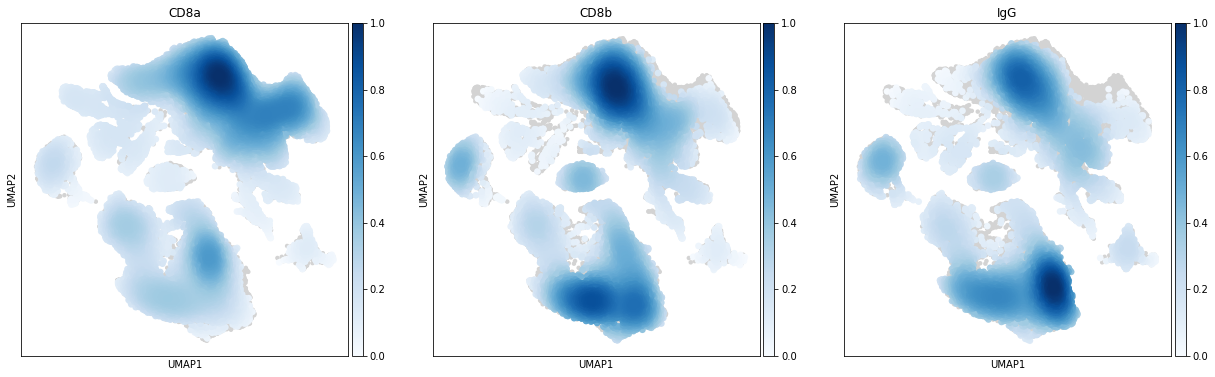

In [18]:
# PART D
sc.tl.embedding_density(nodub_adata, groupby='treatment',basis="umap")
#plt.rcParams["figure.figsize"]=(6,6)

sc.pl.embedding_density(nodub_adata, groupby='treatment',basis="umap",color_map="Blues",show=False)
plt.savefig("plots/all_cells_figure/Fig3D_treatment_embedding_density.pdf",bbox_inches="tight")
plt.savefig("plots/all_cells_figure/Fig3D_treatment_embedding_density.png",bbox_inches="tight")


/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_c

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_c

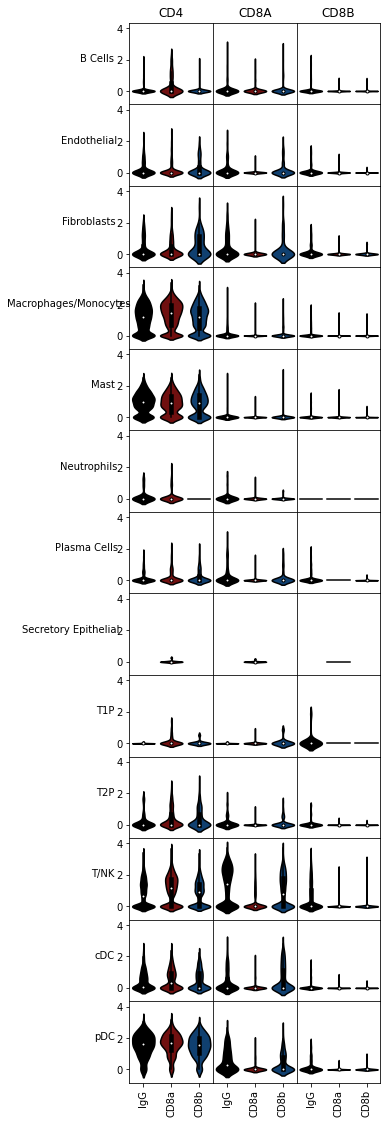

In [8]:
#S4B
genenames = {"CD4":"CD4","CD8A":"CD8A","CD8B":"CD8B"}
cat = "treatment"
vertical_split = "General Celltypes"
fmp.condition_split_violin(nodub_adata,cat,vertical_split,genenames,violin_order = ["IgG","CD8a","CD8b"])
plt.savefig("plots/all_cells_figure/FigS5G_CD8_exp_by_cluster_violin.pdf",bbox_inches="tight")

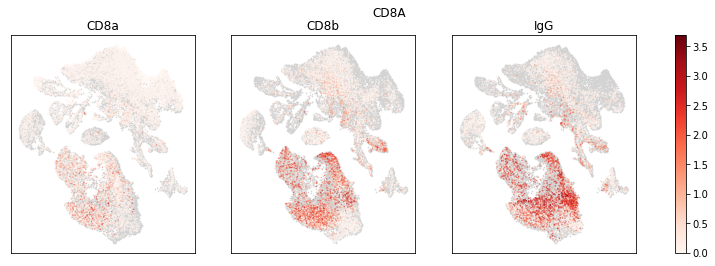

In [9]:
cph.split_umap_by_category(nodub_adata, groupby="treatment",gene="CD8A",nrows=1,ncols=3)
plt.savefig("plots/all_cells_figure/S8_CD8A_split_featureplot.png",bbox_inches="tight")


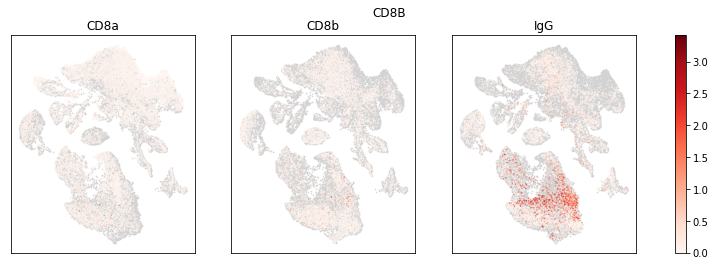

In [10]:
cph.split_umap_by_category(nodub_adata, groupby="treatment",gene="CD8B",nrows=1,ncols=3)
plt.savefig("plots/all_cells_figure/S8_CD8B_split_featureplot.png",bbox_inches="tight")
